1. Cuales son los meses de mayores ventas en general
2. Cuales son los platos que más se venden
3. En qué época se vende más cada plato
4. Cuales son las horas de mayor tráfico
5. Cuales son los platos que menos venden

Estas preguntas necesito responderlas porque quiero proyectar a 
futuro las ventas por cada plato con el fin de proyectar también 
los pedidos que debo hacer a mis proveedores basado en esa información 
"estacional".

In [1]:
import pandas as pd

In [2]:
ruta = 'Data/Sales_Reports/reporte de ventas restaurante/Balaji Fast Food Sales.csv'
df = pd.read_csv(ruta)

Mostrar las primeras filas del DataFrame y la información de las columnas

In [3]:
print(df.info())
print('-'*150)
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   date                1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price          1000 non-null   int64 
 5   quantity            1000 non-null   int64 
 6   transaction_amount  1000 non-null   int64 
 7   transaction_type    893 non-null    object
 8   received_by         1000 non-null   object
 9   time_of_sale        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB
None
------------------------------------------------------------------------------------------------------------------------------------------------------
   order_id        date        item_name  item_type  item_price  quantity  \
0         1  07-03-2022         Aa

Estas son las columnas:

**order_id**: ID del pedido.
**date**: Fecha del pedido.
**item_name**: Nombre del plato.
**item_type**: Tipo de plato (por ejemplo, Fastfood, Beverages).
**item_price**: Precio del plato.
**quantity**: Cantidad pedida.
**transaction_amount**: Monto de la transacción.
**transaction_type**: Tipo de transacción (por ejemplo, Cash, Online).
**received_by**: Persona que recibió el pedido.
**time_of_sale**: Hora del día de la venta (por ejemplo, Morning, Afternoon, Evening, Night).

## Se procede a responder preguntas

In [4]:
data = df.copy()

In [5]:
# Convertir la columna 'date' al formato de fecha
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# 1. Meses con mayores ventas en general
data['month'] = data['date'].dt.month
ventas_por_mes = data.groupby('month')['transaction_amount'].sum().sort_values(ascending=False)

# 2. Platos que más se venden
ventas_por_plato = data.groupby('item_name')['quantity'].sum().sort_values(ascending=False)

# 3. Época en que más se vende cada plato
data['season'] = data['date'].dt.month % 12 // 3 + 1
ventas_por_plato_y_temporada = data.groupby(['item_name', 'season'])['quantity'].sum().sort_values(ascending=False)

# 4. Horas del día con mayor tráfico
ventas_por_hora = data.groupby('time_of_sale')['order_id'].count().sort_values(ascending=False)

# 5. Platos que menos venden
menos_ventas_por_plato = data.groupby('item_name')['quantity'].sum().sort_values(ascending=True)

print("Ventas totales por mes:")
print(ventas_por_mes)
print('-'*150)
print("\nPlatos más vendidos:")
print(ventas_por_plato)
print('-'*150)
print("\nPlatos que menos venden:")
print(menos_ventas_por_plato)
print('-'*150)
print("\nVentas de platos por temporada:")
print(ventas_por_plato_y_temporada)
print('-'*150)
print("\nHoras con mayor tráfico:")
print(ventas_por_hora)

Ventas totales por mes:
month
1     28670
10    27205
5     26570
2     25595
3     25390
12    23460
11    22900
8     22305
7     19490
9     18640
4     17670
6     17335
Name: transaction_amount, dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------

Platos más vendidos:
item_name
Cold coffee        1361
Sugarcane juice    1278
Panipuri           1226
Frankie            1150
Sandwich           1097
Aalopuri           1044
Vadapav            1006
Name: quantity, dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------

Platos que menos venden:
item_name
Vadapav            1006
Aalopuri           1044
Sandwich           1097
Frankie            1150
Panipuri           1226
Sugarcane juice    1278
Cold coffee        1361
Name: quantity, dtype: int64
-----------------------

## Proyecciones de ventas por plato

In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

2024-04-30 15:00:35.892074: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/samueltg92/.local/lib/python3.8/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (2.1.0) or chardet (None)/charset_normalizer (2.0.11) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [49]:
# Asegurar que los datos estén ordenados por fecha
data.sort_values('date', inplace=True)

unique_items = data['item_name'].unique() # platos disponibles

print(unique_items)

['Sandwich' 'Cold coffee' 'Panipuri' 'Aalopuri' 'Frankie' 'Vadapav'
 'Sugarcane juice']


Datos estadisticos descriptivos

In [50]:
for item in unique_items:
    # Filtrar datos para el plato actual
    item_data = data[data['item_name'] == item]
    
    # Calcular estadísticas descriptivas
    statistics = item_data['quantity'].describe()
    skewness = item_data['quantity'].skew()
    kurtosis = item_data['quantity'].kurt()
    
    # Imprimir las estadísticas
    print(f"Estadísticas para {item}:")
    print(statistics)
    print(f"Skewness: {skewness}")  # Asimetría
    print(f"Kurtosis: {kurtosis}")  # Curtosis
    print("\n")  # Agrega una línea en blanco para separar cada plato

Estadísticas para Sandwich:
count    129.000000
mean       8.503876
std        4.460108
min        1.000000
25%        5.000000
50%        8.000000
75%       13.000000
max       15.000000
Name: quantity, dtype: float64
Skewness: -0.12633479967743055
Kurtosis: -1.140407212506498


Estadísticas para Cold coffee:
count    161.000000
mean       8.453416
std        4.217449
min        1.000000
25%        5.000000
50%        9.000000
75%       12.000000
max       15.000000
Name: quantity, dtype: float64
Skewness: -0.16680017525126586
Kurtosis: -1.1103556613935672


Estadísticas para Panipuri:
count    150.000000
mean       8.173333
std        4.366970
min        1.000000
25%        5.000000
50%        9.000000
75%       12.000000
max       15.000000
Name: quantity, dtype: float64
Skewness: -0.1392077646858942
Kurtosis: -1.2730061408051585


Estadísticas para Aalopuri:
count    134.000000
mean       7.791045
std        4.787318
min        1.000000
25%        3.000000
50%        8.000000
75%  

## Preparar datos

In [66]:
item_data = data[data['item_name'] == 'Sandwich'].copy()

# Crear características de estacionalidad, por ejemplo, lags y medias móviles
item_data['prev_day_quantity'] = item_data['quantity'].shift(1).fillna(0)
item_data['rolling_mean'] = item_data['quantity'].rolling(window=10).mean().fillna(0) # Estacionalidad semanal

# Escalar características
scaler = MinMaxScaler(feature_range=(0, 1))
item_data_scaled = scaler.fit_transform(item_data[['quantity', 'prev_day_quantity', 'rolling_mean']])

num_features = item_data_scaled.shape[1]

# Preparar datos para LSTM: secuencias de entrada y salida
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), :]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 30  # Usar una semana de datos para predecir el siguiente día - *|*|*|*|*|*|*|*|*|*|*|*|*|*|*|*|*|*|*|*|*|*|*|*|*
X, y = create_dataset(item_data_scaled, look_back)

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Construcción del Modelo

LSTM

In [ ]:
# # Construir modelo LSTM con Dropout y regularización L2
# model = Sequential()
# model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(50, return_sequences=False, kernel_regularizer=l2(0.01)))
# model.add(Dense(1))

# # Compilar el modelo
# model.compile(optimizer='adam', loss='mean_squared_error')

# # Entrenar el modelo
# model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=2)

CNN (Convutional Neural Networks)

In [89]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=2)

Epoch 1/100
2/2 - 1s - loss: 0.3591 - 932ms/epoch - 466ms/step
Epoch 2/100
2/2 - 0s - loss: 0.1156 - 85ms/epoch - 42ms/step
Epoch 3/100
2/2 - 0s - loss: 0.1532 - 40ms/epoch - 20ms/step
Epoch 4/100
2/2 - 0s - loss: 0.1682 - 52ms/epoch - 26ms/step
Epoch 5/100
2/2 - 0s - loss: 0.1295 - 66ms/epoch - 33ms/step
Epoch 6/100
2/2 - 0s - loss: 0.1053 - 99ms/epoch - 50ms/step
Epoch 7/100
2/2 - 0s - loss: 0.1112 - 112ms/epoch - 56ms/step
Epoch 8/100
2/2 - 0s - loss: 0.1212 - 55ms/epoch - 28ms/step
Epoch 9/100
2/2 - 0s - loss: 0.1215 - 91ms/epoch - 45ms/step
Epoch 10/100
2/2 - 0s - loss: 0.1135 - 40ms/epoch - 20ms/step
Epoch 11/100
2/2 - 0s - loss: 0.1039 - 17ms/epoch - 8ms/step
Epoch 12/100
2/2 - 0s - loss: 0.0996 - 29ms/epoch - 15ms/step
Epoch 13/100
2/2 - 0s - loss: 0.0997 - 22ms/epoch - 11ms/step
Epoch 14/100
2/2 - 0s - loss: 0.1012 - 37ms/epoch - 18ms/step
Epoch 15/100
2/2 - 0s - loss: 0.1017 - 53ms/epoch - 26ms/step
Epoch 16/100
2/2 - 0s - loss: 0.0995 - 12ms/epoch - 6ms/step
Epoch 17/100
2/2

## Predicción y Evaluación

In [90]:
# Hacer predicciones
predictions = model.predict(X_test)

# Concatenar predictions con la parte relevante de X_test para revertir la escala correctamente
X_test_last = X_test[:, -1, 1:]  # Esto asume que quieres todas las características excepto la primera
predictions_combined = np.concatenate((predictions, X_test_last), axis=1)

# Invertir la escala de las predicciones y valores verdaderos para comparar
predictions_inverse = scaler.inverse_transform(predictions_combined)[:, 0]
y_test_inverse = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), X_test_last), axis=1))[:, 0]

# Calcular y mostrar MSE
mse = mean_squared_error(y_test_inverse, predictions_inverse)
print(f'MSE: {mse}')

1/1 [==============================] - 0s 88ms/step
MSE: 27.843614221179557


## Visualización de resultados

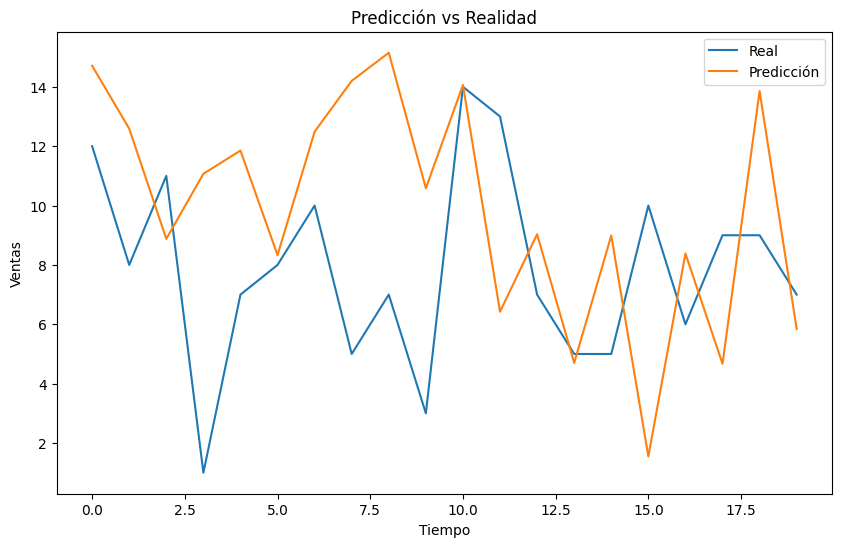

In [91]:
# Visualización de Resultados
plt.figure(figsize=(10, 6))
plt.plot(y_test_inverse, label='Real')
plt.plot(predictions_inverse, label='Predicción')
plt.title('Predicción vs Realidad')
plt.xlabel('Tiempo')
plt.ylabel('Ventas')
plt.legend()
plt.show()

## Predicciones futuras

In [92]:
# Obtener el último bloque de datos del dataset para iniciar las predicciones
last_block = item_data_scaled[-look_back:]
last_block = last_block.reshape(1, look_back, last_block.shape[1])

In [95]:
future_days = 25
future_predictions = []

# Copiar el último bloque para usarlo recursivamente
current_block = last_block.copy()

for i in range(future_days):
    # Hacer la predicción utilizando el bloque actual
    current_prediction = model.predict(current_block)
    future_predictions.append(current_prediction[0, 0])
    
    # Preparar nueva entrada para el modelo
    new_input = np.zeros((1, 1, num_features))
    new_input[0, 0, 0] = current_prediction
    new_input[0, 0, 1:] = current_block[0, -1, 1:]  # mantener características adicionales
    
    # Actualizar el bloque para la siguiente predicción
    current_block = np.append(current_block[:, 1:, :], new_input, axis=1)

placeholder = np.zeros((len(future_predictions), num_features))

# Colocar las predicciones en la columna que corresponde a las ventas
# Asumiendo que la columna de 'quantity' es la primera, ajustamos esa columna
placeholder[:, 0] = future_predictions

# Revertir la escala de las predicciones
future_predictions_scaled = scaler.inverse_transform(placeholder)[:, 0]

1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 73ms/step


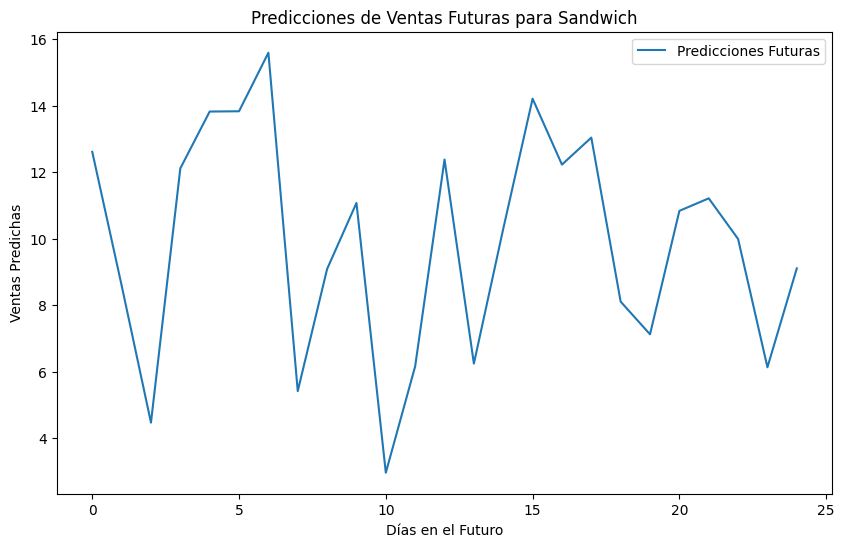

In [96]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(future_predictions_scaled)), future_predictions_scaled, label='Predicciones Futuras')
plt.title('Predicciones de Ventas Futuras para Sandwich')
plt.xlabel('Días en el Futuro')
plt.ylabel('Ventas Predichas')
plt.legend()
plt.show()